In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
moresck_datafile = '../shared_data/MoresCk_WY1976-2015.csv'

df_moresck = pd.read_csv(moresck_datafile)
df_moresck

,agency_cd,site_no,date,streamflow,qaqc_flag
0,USGS,13200000,1975-10-01,46.0,A
1,USGS,13200000,1975-10-02,45.0,A
2,USGS,13200000,1975-10-03,45.0,A
3,USGS,13200000,1975-10-04,45.0,A
4,USGS,13200000,1975-10-05,45.0,A
...,...,...,...,...,...
14605,USGS,13200000,2015-09-26,22.9,A
14606,USGS,13200000,2015-09-27,22.4,A
14607,USGS,13200000,2015-09-28,22.5,A
14608,USGS,13200000,2015-09-29,22.6,A


In [5]:
df_moresck.date.dtype

dtype('O')

In [12]:
newdate = pd.to_datetime(df_moresck['date'])
newdate

0       1975-10-01
1       1975-10-02
2       1975-10-03
3       1975-10-04
4       1975-10-05
           ...    
14605   2015-09-26
14606   2015-09-27
14607   2015-09-28
14608   2015-09-29
14609   2015-09-30
Name: date, Length: 14610, dtype: datetime64[ns]

Note that this is now of time `datetime64` which is what we want. Now we have to add it to the dataframe.

In [13]:
df_moresck['date'] = newdate
df_moresck

,agency_cd,site_no,date,streamflow,qaqc_flag
0,USGS,13200000,1975-10-01,46.0,A
1,USGS,13200000,1975-10-02,45.0,A
2,USGS,13200000,1975-10-03,45.0,A
3,USGS,13200000,1975-10-04,45.0,A
4,USGS,13200000,1975-10-05,45.0,A
...,...,...,...,...,...
14605,USGS,13200000,2015-09-26,22.9,A
14606,USGS,13200000,2015-09-27,22.4,A
14607,USGS,13200000,2015-09-28,22.5,A
14608,USGS,13200000,2015-09-29,22.6,A


In [17]:
df_moresck['date'].dtype

dtype('<M8[ns]')

In [19]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

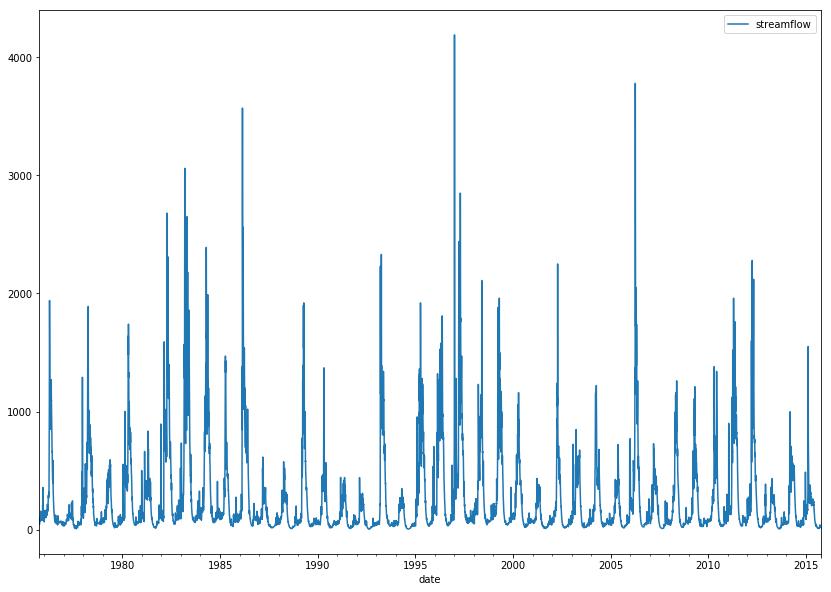

In [22]:
df_moresck.plot(x='date',y='streamflow',figsize=(14,10))

If that is true we should be able to use the pandas operator `groupby()` to group the data by year.

In [33]:
df_moresck.index = df_moresck['date']
df_moresck.index

DatetimeIndex(['1975-10-01', '1975-10-02', '1975-10-03', '1975-10-04',
               '1975-10-05', '1975-10-06', '1975-10-07', '1975-10-08',
               '1975-10-09', '1975-10-10',
               ...
               '2015-09-21', '2015-09-22', '2015-09-23', '2015-09-24',
               '2015-09-25', '2015-09-26', '2015-09-27', '2015-09-28',
               '2015-09-29', '2015-09-30'],
              dtype='datetime64[ns]', name='date', length=14610, freq=None)

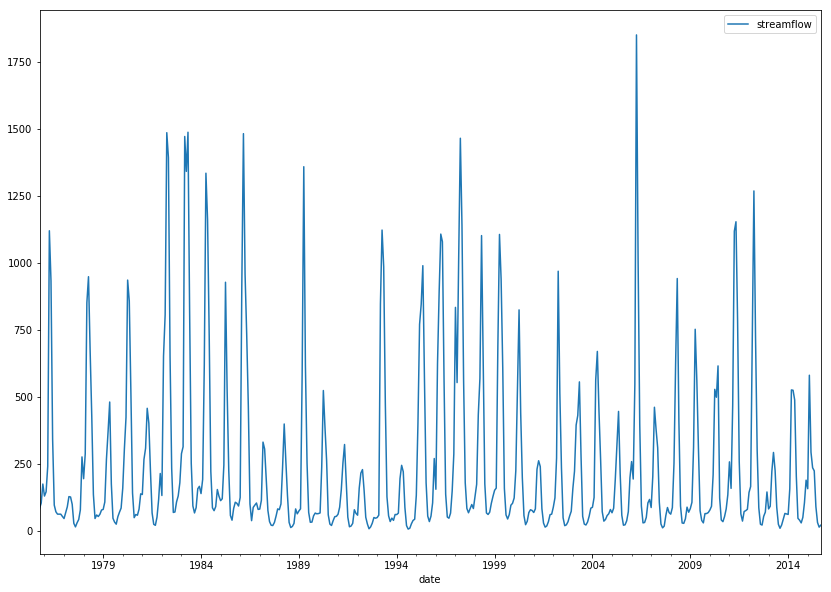

In [39]:
df_moresck.resample('M').mean().plot(y='streamflow',figsize=(14,10))

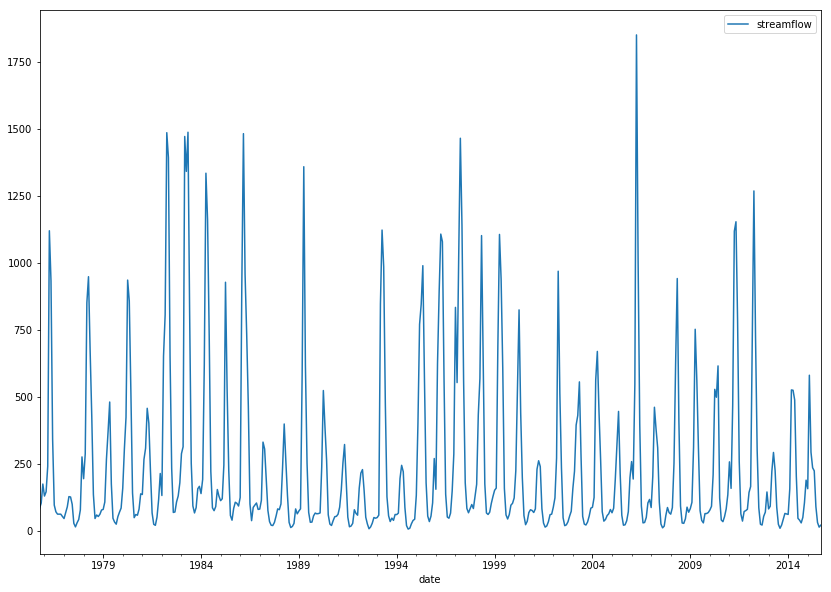

In [45]:
df_moresck.groupby(pd.Grouper(key='date', freq='1M')).mean().plot(y='streamflow',figsize=(14,10))

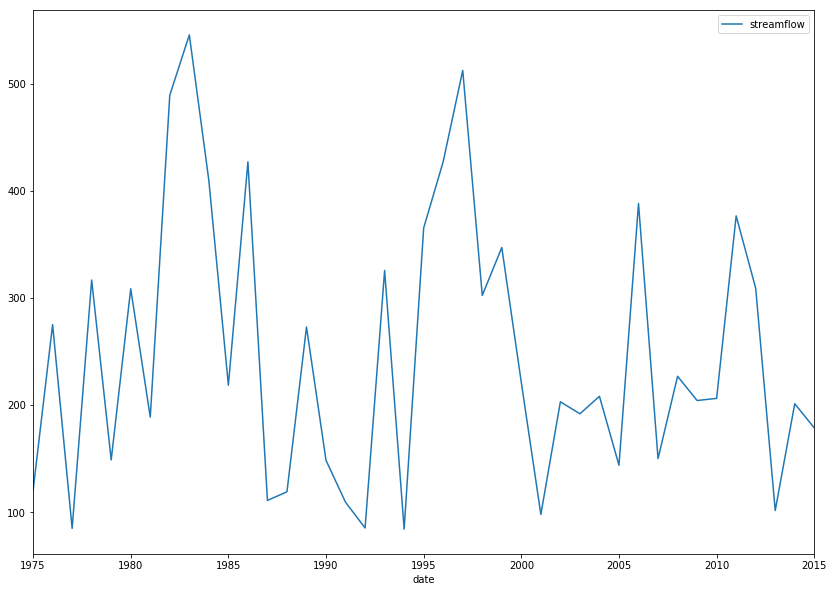

In [54]:
df_moresck.groupby(df_moresck.index.year).mean().plot(y='streamflow',figsize=(14,10))

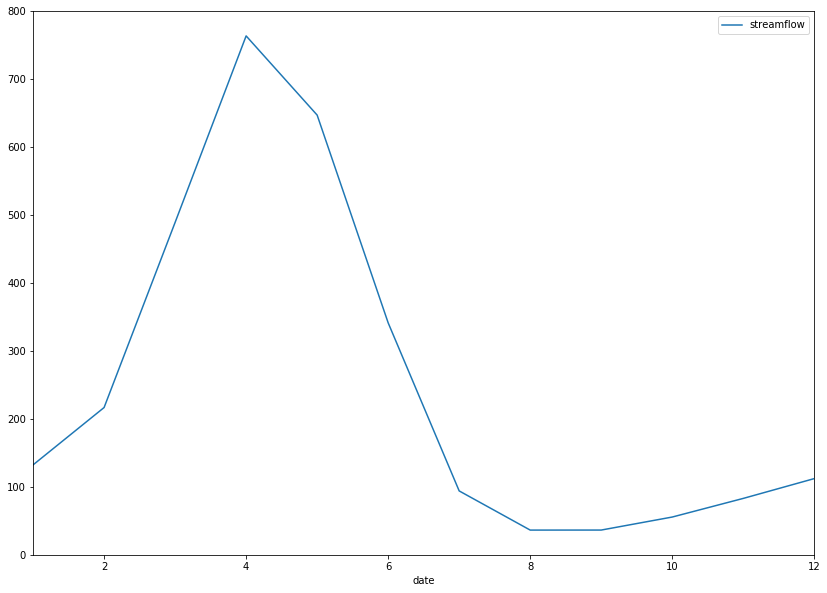

In [57]:
df_moresck.groupby(df_moresck.index.month).mean().plot(y='streamflow',figsize=(14,10))

In [59]:
df_moresck1 = df_moresck[df_moresck['date'] < '1995-10-01']
df_moresck2 = df_moresck[df_moresck['date'] >= '1995-10-01']

In [66]:
Q_moresck1 = df_moresck1.groupby(df_moresck1.index.month).mean().streamflow.values
Q_moresck1

array([109.25645161, 223.93451327, 517.75322581, 763.24333333,
       643.58064516, 337.23333333,  97.97935484,  38.83709677,
        41.22983333,  57.92419355,  83.27666667, 106.38387097])

In [67]:
Q_moresck2 = df_moresck2.groupby(df_moresck2.index.month).mean().streamflow.values
Q_moresck2

array([155.59241935, 209.68353982, 460.55      , 763.81      ,
       650.5       , 345.54816667,  90.22516129,  34.12690323,
        31.82828333,  53.4466129 ,  82.90733333, 118.09403226])

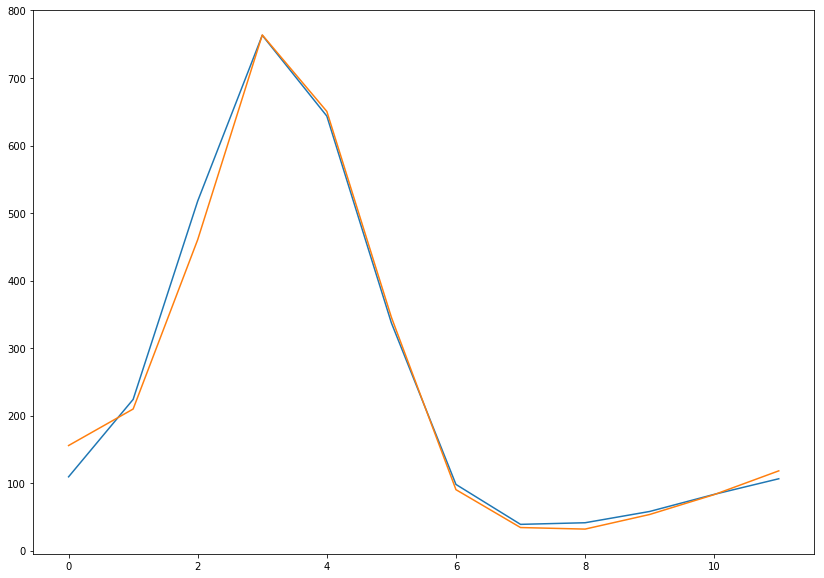

In [69]:
plt.figure(figsize=(14,10))
plt.plot(np.arange(12),Q_moresck1,np.arange(12),Q_moresck2)